In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [2]:
df=pd.read_csv(r"D:/VS Code/Final Project/smart_agriculture/backend/data/crop_recommendation.csv")

In [4]:
df.head(6)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice


In [14]:
df.tail(6)

,N,P,K,temperature,humidity,ph,rainfall,label
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [15]:
df.size

17600

In [16]:
df.shape

(2200, 8)

In [17]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [18]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [19]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [21]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [29]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\paras\AppData\Local\Temp\ipykernel_14152\775922366.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


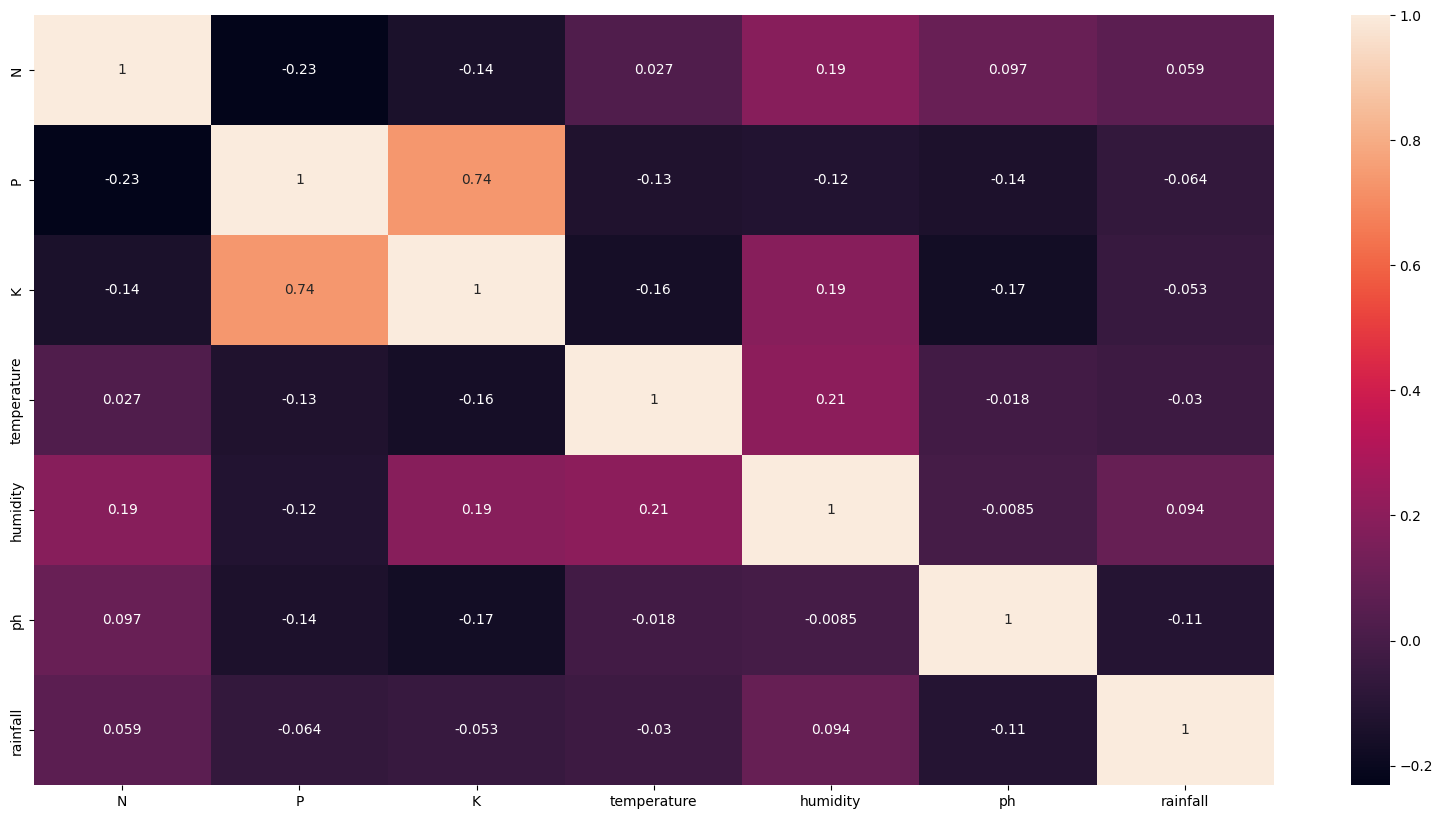

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Separating Features and target label

In [6]:
features = df[['N', 'P', 'K','temperature','humidity','ph']]
target = df['label']
labels = df['label']

In [7]:
# empty lists to store model names and their corresponding accuracies
model = []
acc = []

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features, target, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1760, 6) (1760,)
Test set: (440, 6) (440,)


## Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print(f"Naive Bayes's Accuracy is: {x*100} %")

print(classification_report(Y_test,predicted_values))


Naive Bayes's Accuracy is: 96.13636363636363 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.76      0.90      0.83        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.95      0.97        20
      coffee       0.95      1.00      0.98        21
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        24
        jute       0.90      0.82      0.86        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.89      0.77      0.83        22
       maize       1.00      0.96      0.98        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.94      0.97        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [10]:
# cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes, features, target, cv=5)
score

array([0.95909091, 0.96590909, 0.96363636, 0.96590909, 0.96363636])

#### Saving trained Naive Bayes Model

In [11]:
NB_pkl_filepath = '../models/NBClassifier.pkl'
NB_model_pkl = open(NB_pkl_filepath, 'wb')
pkl.dump(NaiveBayes, NB_model_pkl)
NB_model_pkl.close()

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, Y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print(f"Decision Tree's Accuracy is: {x*100} %")

print(classification_report(Y_test, predicted_values))

Decision Tree's Accuracy is: 81.81818181818183 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       0.95      1.00      0.97        18
   blackgram       0.44      1.00      0.61        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        21
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        24
        jute       0.67      0.18      0.29        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.00      0.00      0.00        22
       maize       1.00      0.96      0.98        24
       mango       0.41      1.00      0.58        20
   mothbeans       1.00      0.29      0.45        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       0.94      1.00      0.97        17
      orange       1.00      1.0

c:\Users\paras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\paras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\paras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:
# cross validation score (DecisionTree)
score = cross_val_score(DecisionTree, features, target, cv=5)
score

array([0.89545455, 0.87045455, 0.86590909, 0.83181818, 0.87272727])

### Saving trained Decision Tree Model

In [14]:
DT_pkl_filepath = '../models/DecisionTree.pkl'
DT_model_pkl = open(DT_pkl_filepath, 'wb')
pkl.dump(DecisionTree, DT_model_pkl)
DT_model_pkl.close()

## Support Vector Machine

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, Y_train)

predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('SVM')
print(f"SVM's Accuracy is: {x*100} %")

print(classification_report(Y_test, predicted_values))

SVM's Accuracy is: 94.77272727272728 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.77      0.81      0.79        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.95      0.97        20
      coffee       0.95      1.00      0.98        21
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        24
        jute       0.76      0.86      0.81        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.85      0.77      0.81        22
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
   mothbeans       0.94      0.88      0.91        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

In [16]:
# cross validation score (SVM)
score = cross_val_score(SVM, features, target, cv=5)
score

array([0.91363636, 0.94545455, 0.93409091, 0.91818182, 0.92272727])

### Saving SVM Classifier Model

In [17]:
SVM_pkl_filepath = '../models/SVMClassifier.pkl'
SVM_model_pkl = open(SVM_pkl_filepath, 'wb')
pkl.dump(SVM, SVM_model_pkl)
SVM_model_pkl.close()

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train, Y_train)

predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print(f"Logistic Regression's Accuracy is: {x*100} %")

print(classification_report(Y_test, predicted_values))

Logistic Regression's Accuracy is: 87.72727272727273 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.59      0.76      0.67        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.95      0.97        20
      coffee       0.88      1.00      0.93        21
      cotton       0.88      0.88      0.88        16
      grapes       1.00      1.00      1.00        24
        jute       0.68      0.77      0.72        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.81      0.77      0.79        22
       maize       0.88      0.92      0.90        24
       mango       1.00      0.95      0.97        20
   mothbeans       0.86      0.71      0.77        17
    mungbean       0.94      1.00      0.97        15
   muskmelon       0.65      0.65      0.65        17
      orange       1.00   

c:\Users\paras\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Saving Logistic Regression Model

In [46]:
LR_pkl_filepath = '../models/LogisticRegression.pkl'
LR_model_pkl = open(LR_pkl_filepath, 'wb')
pkl.dump(LogReg, LR_model_pkl)
LR_model_pkl.close()

## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, Y_train)

predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print(f"RandomForestClassifier's Accuracy is: {x*100} %")

print(classification_report(Y_test, predicted_values))

RandomForestClassifier's Accuracy is: 96.36363636363636 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.77      0.95      0.85        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        24
        jute       0.86      0.86      0.86        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.94      0.73      0.82        22
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
   mothbeans       0.94      0.94      0.94        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

In [20]:
# cross validation score (RFClassifier)
score = cross_val_score(RF, features, target, cv=5)
score

array([0.96590909, 0.97727273, 0.96136364, 0.95454545, 0.96363636])

### Saving RF Classifier Model

In [49]:
RF_pkl_filepath = '../models/RandomForest.pkl'
RF_model_pkl = open(RF_pkl_filepath, 'wb')
pkl.dump(RF, RF_model_pkl)
RF_model_pkl.close()

## KNN Classifier Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

predicted_values = KNN.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('KNN')
print(f"KNN's Accuracy is: {x*100} %")

print(classification_report(Y_test, predicted_values))

KNN's Accuracy is: 91.36363636363637 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.60      0.86      0.71        21
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.98        21
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        24
        jute       0.80      0.55      0.65        22
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.70      0.64      0.67        22
       maize       1.00      0.92      0.96        24
       mango       0.95      1.00      0.98        20
   mothbeans       0.89      0.94      0.91        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       0.85      1.00      0.92        17
      orange       1.00      1.00      1.0

In [22]:
# cross validation score (KNN)
score = cross_val_score(KNN, features, target, cv=5)
score

array([0.91363636, 0.93863636, 0.93409091, 0.90681818, 0.92727273])

### Saving KNN Classifier Model

In [53]:
KNN_pkl_filepath = '../models/KNNClassifier.pkl'
KNN_model_pkl = open(KNN_pkl_filepath, 'wb')
pkl.dump(KNN, KNN_model_pkl)
KNN_model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Classifiers'>

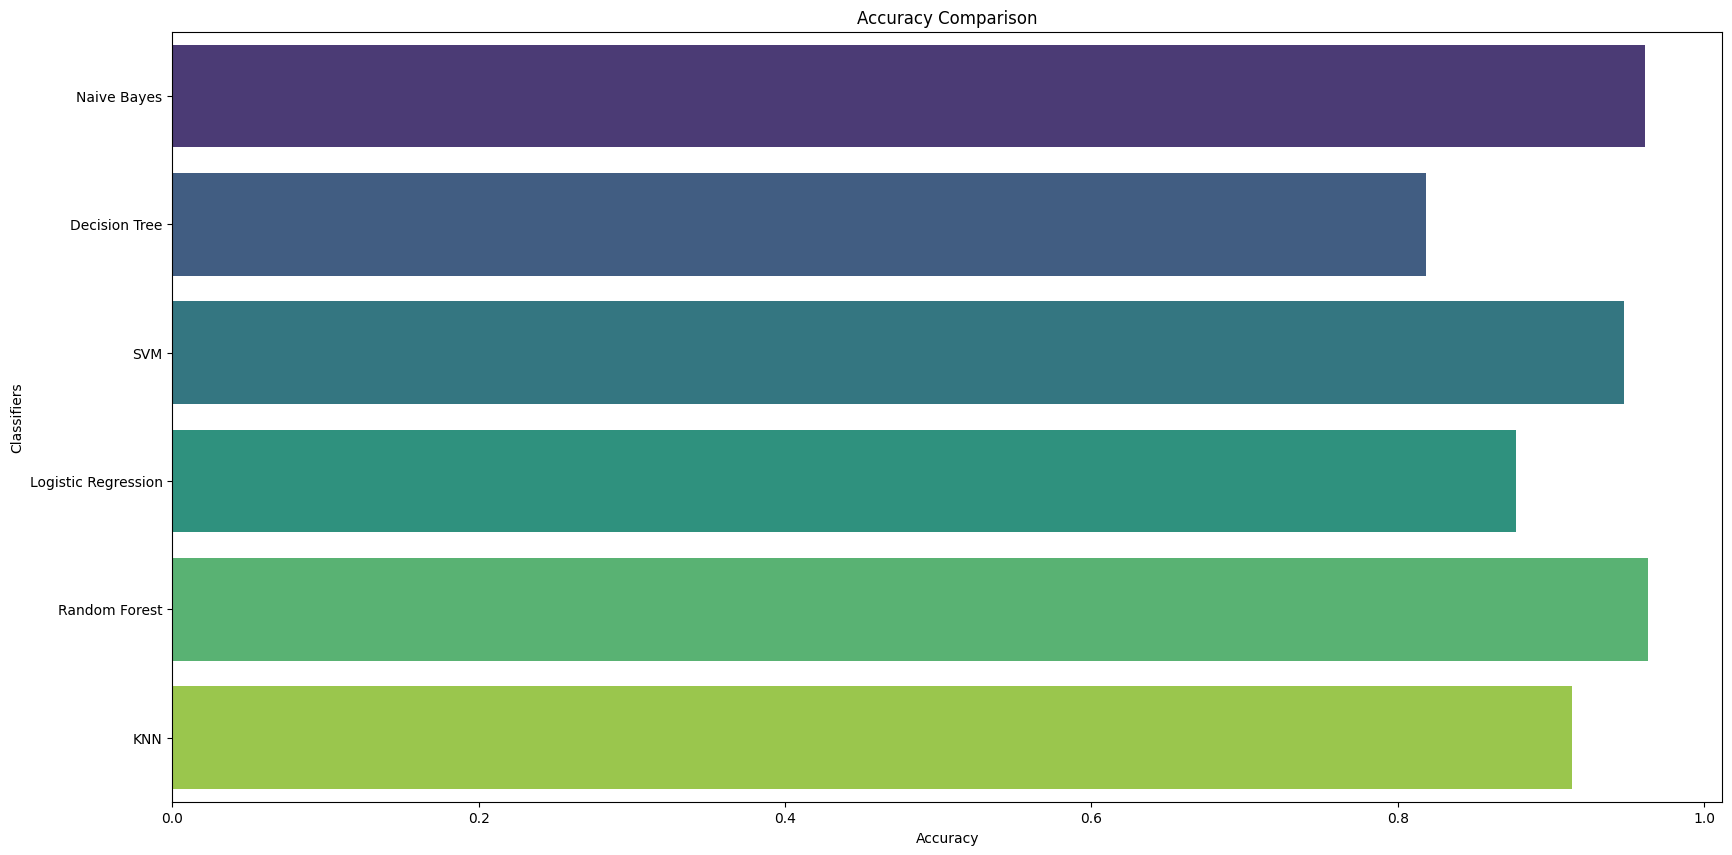

In [23]:
plt.figure(figsize=[20, 10], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')

sns.barplot(x=acc, y=model, hue=model, palette='viridis')

In [24]:
models_accuracy = dict(zip(model, acc))
for k, v in models_accuracy.items():
    print(f"{k}: {v*100} %")

Naive Bayes: 96.13636363636363 %
Decision Tree: 81.81818181818183 %
SVM: 94.77272727272728 %
Logistic Regression: 87.72727272727273 %
Random Forest: 96.36363636363636 %
KNN: 91.36363636363637 %


## Making Predictions

In [27]:
data = np.array([[104,18, 30,20.806, 23.603016, 60.3]])
prediction = NaiveBayes.predict(data)
print("Recommended Crop: ",prediction)

Recommended Crop:  ['mothbeans']


In [28]:
data = np.array([[136, 18, 212, 28.8, 23.60, 5.43]])
prediction = NaiveBayes.predict(data)
print("Recommended Crop: ",prediction)

Recommended Crop:  ['chickpea']
